<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab *7*: *Imbalanced Classification & NN***

###**Tenggat Waktu: 5 Desember 2022, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_Lab7_NPM_Nama.ipynb**. Contoh: A_Lab7_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **5 Desember 2022, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan penalti.

In [93]:
# Isi dengan data diri Anda
NAMA = "Muhammad Iqbal Asrif"
KELAS = "B"
NPM = "2006473945"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = ["https://towardsdatascience.com/the-vanishing-gradient-problem-69bf08b15484"]

In [94]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Muhammad Iqbal Asrif dari kelas B dengan NPM 2006473945, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Muhammad Iqbal Asrif)


This section is modified by Asisten Dosen KASDD Genap 2022/2023

In [95]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.under_sampling import NearMiss
from numpy import where
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Imbalanced Classification

Imbalanced datasets adalah kumpulan data yang memiliki ketidakseimbangan dalam distribusi kelas. Terdapat dua keadaan dalam imbalanced data ini, yaitu Slight Imbalance, tidak merata dengan jumlah kecil (misalnya 4:6), dan Severe Imbalance, tidak merata dengan jumlah besar (misalnya 1:1000).

Imbalanced data ini dapat menyebabkan banyak kesalahan dalam suatu pengklasifikasian pada kelas minoritas. Kelas minoritas akan lebih sulit untuk diprediksi karena hanya ada sedikit data pada kelas tersebut jika dibandingkan dengan kelas mayoritas. Data yang tidak seimbang ini dapat pengklasifikasi bias terhadap kelas mayoritas.  Hal ini dikarenakan, pada kasus data tidak seimbang, model klasifikasi akan cenderung berfokus untuk mempelajari karakteristik data pada kelas mayoritas dan cenderung mengabaikan kelas minoritas.

Salah satu pendekatan untuk mengatasi masalah ketidakseimbangan kelas adalah secara acak sampel ulang dataset pelatihan. Dua pendekatan utama untuk sampling secara acak kumpulan data yang tidak seimbang adalah dengan mengurangi contoh-contoh dari kelas mayoritas, yang disebut undersampling, dan untuk menambah contoh-contoh untuk kelas minoritas, yang disebut oversampling.

### Oversampling Techniques

Oversampling adalah suatu metode dalam **memperbanyak** data minoritas. Dengan begitu, model klasifikasi dapat lebih mempelajari karakteristik untuk data minoritas. Terdapat beberapa teknik dalam melakukan oversampling, seperti Random Oversampling, Synthetic Minority Oversampling Technique (SMOTE), Borderline-SMOTE, Borderline Oversampling with SVM, dan Adaptive Synthetic Sampling (ADASYN). Konsep dari penerapan kelima teknik ini dapat dilihat pada slide scele yang tentunya sudah kalian pelajari di kelas.

Berikut ini merupakan contoh data dengan imbalanced classification.

In [96]:
# example of random oversampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# summarize class distribution
counter_y = Counter(y)
print(counter_y)


Counter({0: 9900, 1: 100})


In [97]:
type(X)

numpy.ndarray

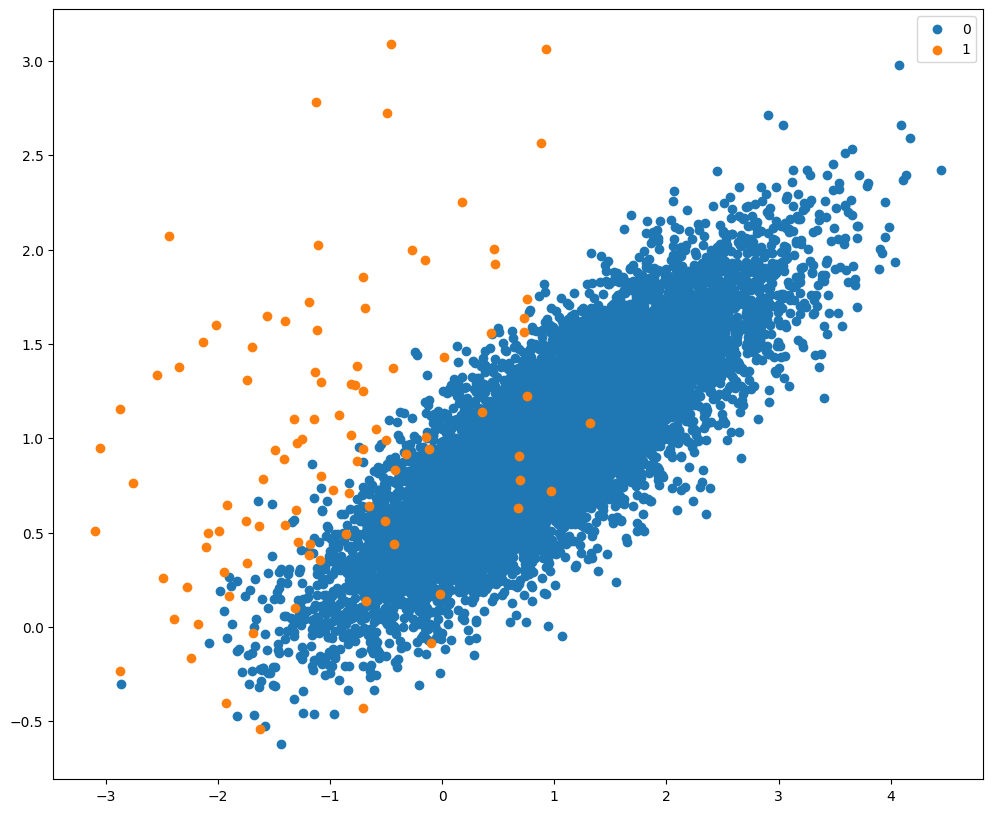

In [98]:
# scatter plot of examples by class label
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()


Dapat dilihat dari contoh data diatas dimana jumlah dari data minoritas sangat jauh lebih sedikit dibandingkan data mayoritasnya. Pada materi ini akan di contohkan salah satu penerapan oversampling dengan menggunakan SMOTE.

#### Synthetic Minority Oversampling Technique (SMOTE)


Teknik Oversampling Minoritas Sintetis (SMOTE) adalah teknik statistik untuk meningkatkan jumlah kasus dalam himpunan data Anda dengan cara yang seimbang. Komponen bekerja dengan menghasilkan contoh (instance) baru dari kasus minoritas yang Anda berikan sebagai input. Implementasi SMOTE ini tidak mengubah jumlah kasus mayoritas.

Instans baru bukan hanya salinan kasus minoritas yang ada. Sebagai gantinya, algoritma mengambil sampel ruang fitur untuk setiap kelas target dan tetangga terdekatnya. Algoritma kemudian menghasilkan contoh baru yang menggabungkan fitur kasus target dengan fitur tetangganya. Pendekatan ini meningkatkan fitur yang tersedia untuk setiap kelas dan membuat sampel lebih umum.

SMOTE mengambil seluruh himpunan data sebagai input, tetap hanyai meningkatkan persentase kasus minoritas. Misalnya, Anda memiliki himpunan data yang tidak seimbang di mana hanya 1 persen kasus yang memiliki nilai target A (kelas minoritas), dan 99 persen kasus memiliki nilai B. Untuk meningkatkan persentase kasus minoritas menjadi dua kali persentase sebelumnya, Anda perlu memasukkan 200 untuk persentase SMOTE di properti komponen.

Ref: https://learn.microsoft.com/id-id/azure/machine-learning/component-reference/smote

Berikut ini contoh penerapan SMOTE dalam imbalanced clasification

In [99]:
# transform the dataset
smote = SMOTE()

# fit and apply the transform
X_smote, y_smote = smote.fit_resample(X, y)

# summarize the new class distribution
counter_y_smote = Counter(y_smote)
print(counter_y_smote)


Counter({0: 9900, 1: 9900})


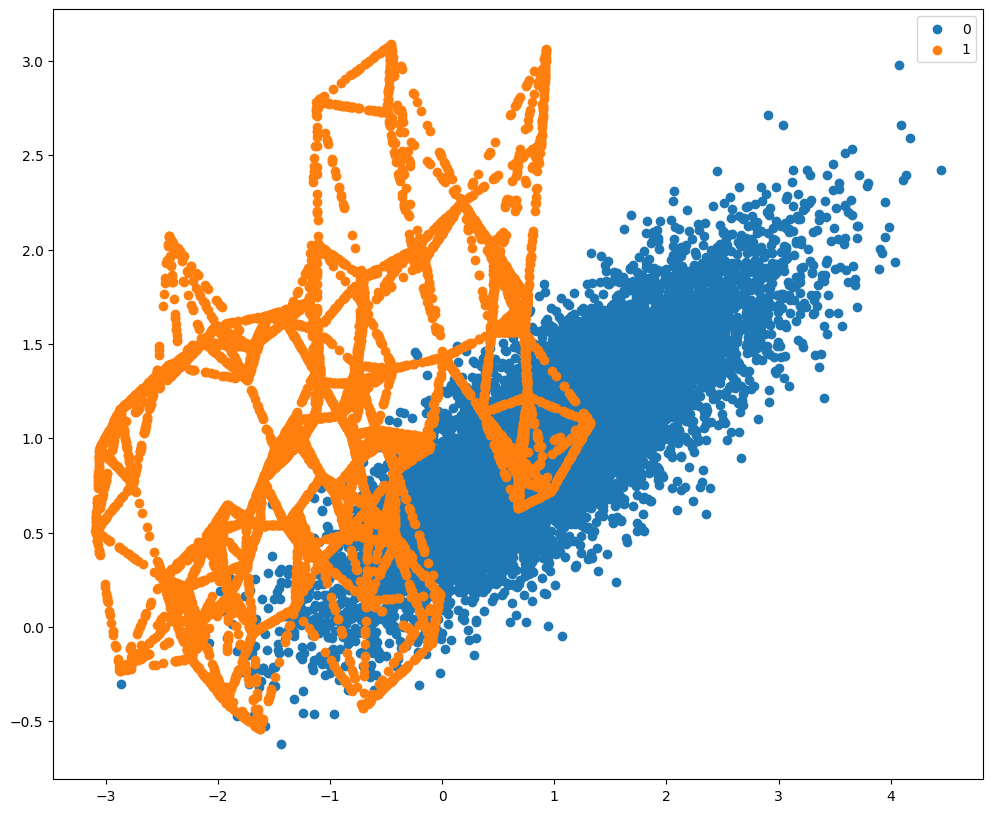

In [100]:
# scatter plot of examples by class label
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_smote.items():
    row_ix = where(y_smote == label)[0]
    pyplot.scatter(X_smote[row_ix, 0], X_smote[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()

#### Penerapan oversampling lainnya

##### Random Oversampling

In [101]:
# define oversampling strategy
randomSample = RandomOverSampler(sampling_strategy='minority')

# fit and apply the transform
X_over, y_over = randomSample.fit_resample(X, y)

# summarize class distribution
counter_y_over = Counter(y_over)
print(counter_y_over)

Counter({0: 9900, 1: 9900})


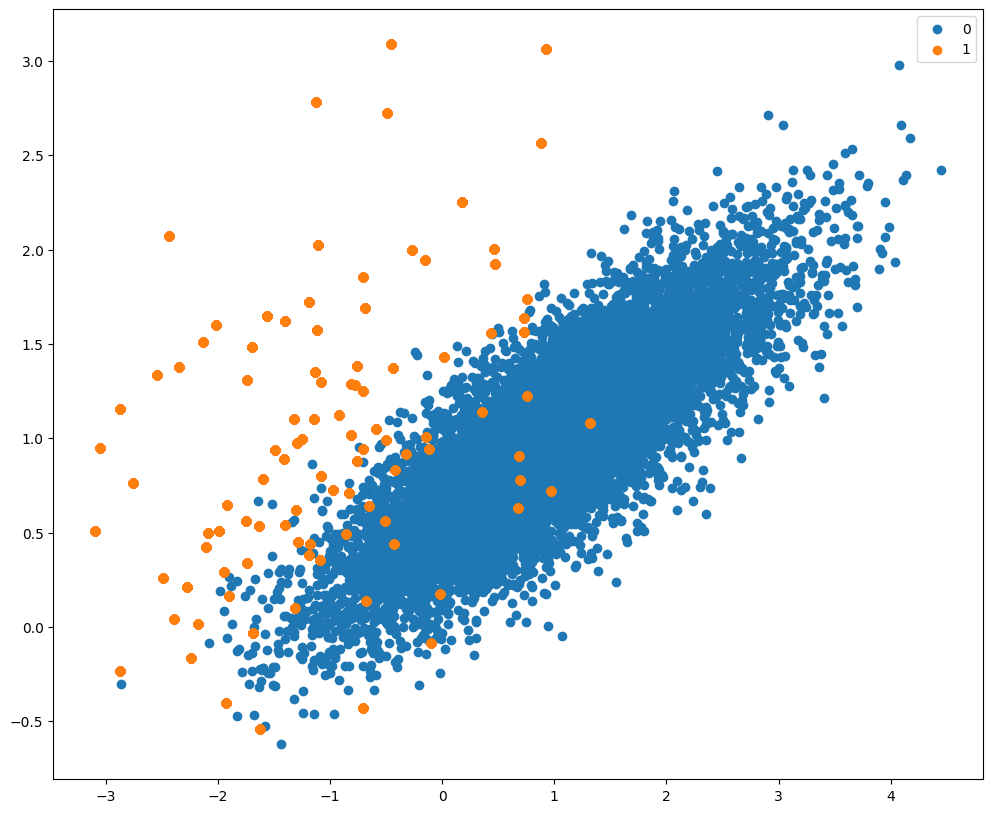

In [102]:
# scatter plot of examples by class label
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_over.items():
    row_ix = where(y_over == label)[0]
    pyplot.scatter(X_over[row_ix, 0], X_over[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()


##### Borderline-SMOTE

In [103]:
# transform the dataset
borderline_smote = BorderlineSMOTE()

# fit and apply the transform
X_borderline_smote, y_borderline_smote = borderline_smote.fit_resample(X, y)

# summarize the new class distribution
counter_y_borderline_smote = Counter(y_borderline_smote)
print(counter_y_borderline_smote)

Counter({0: 9900, 1: 9900})


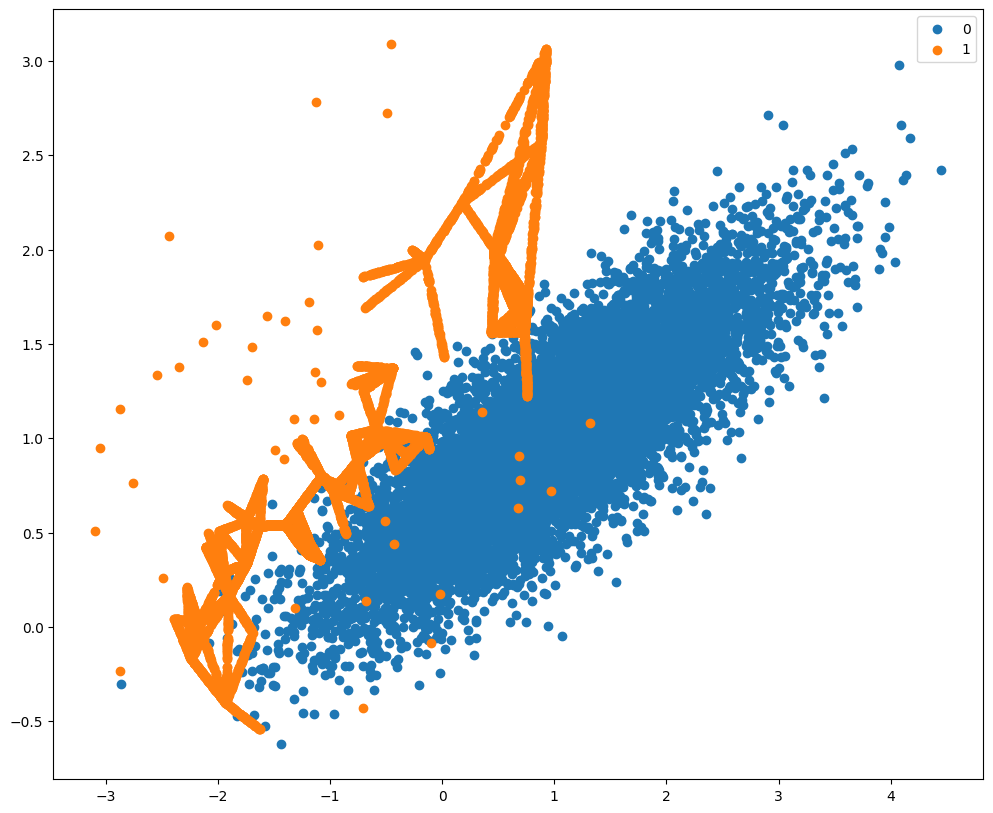

In [104]:
# scatter plot of examples by class label
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_borderline_smote.items():
    row_ix = where(y_borderline_smote == label)[0]
    pyplot.scatter(X_borderline_smote[row_ix, 0], X_borderline_smote[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()

##### Borderline Oversampling with SVM

In [105]:
# transform the dataset
svm_smote = SVMSMOTE()

# fit and apply the transform
X_svm_smote, y_svm_smote = svm_smote.fit_resample(X, y)

# summarize the new class distribution
counter_y_svm_smote = Counter(y_svm_smote)
print(counter_y_svm_smote)


Counter({0: 9900, 1: 9900})


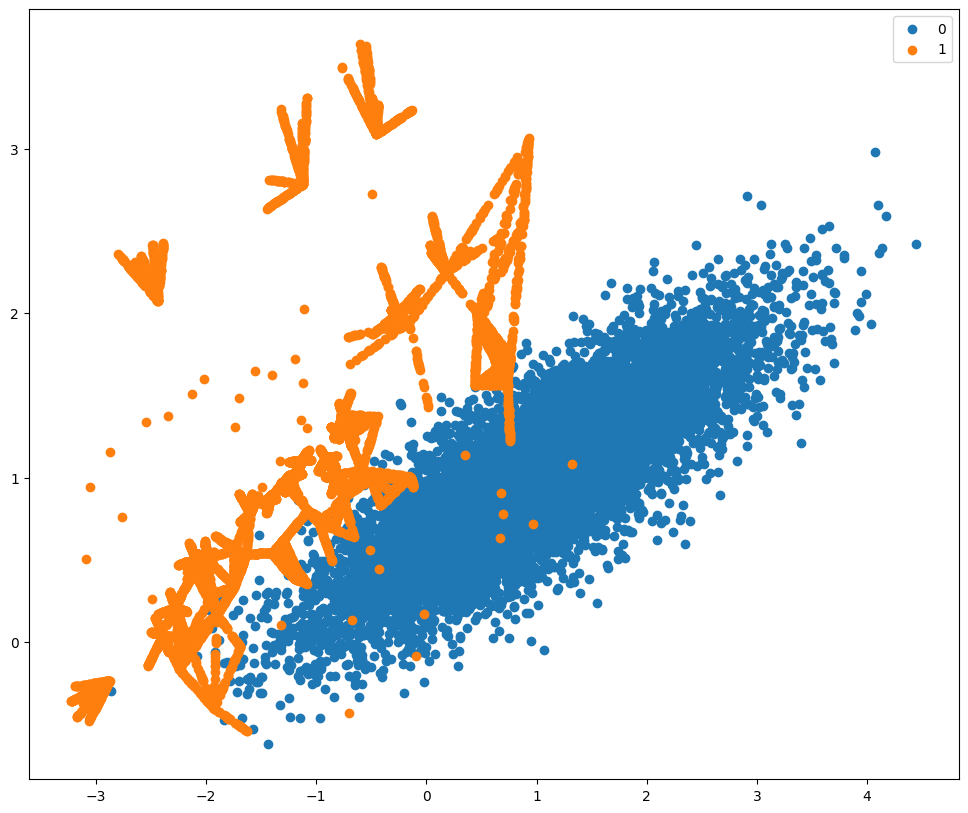

In [106]:
# scatter plot of examples by class label
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_svm_smote.items():
    row_ix = where(y_svm_smote == label)[0]
    pyplot.scatter(X_svm_smote[row_ix, 0],
                   X_svm_smote[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()


##### Adaptive Synthetic Sampling (ADASYN)

In [107]:
# transform the dataset
adasyn = ADASYN()

# fit and apply the transform
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

# summarize the new class distribution
counter_y_adasyn = Counter(y_adasyn)
print(counter_y_adasyn)


Counter({0: 9900, 1: 9899})


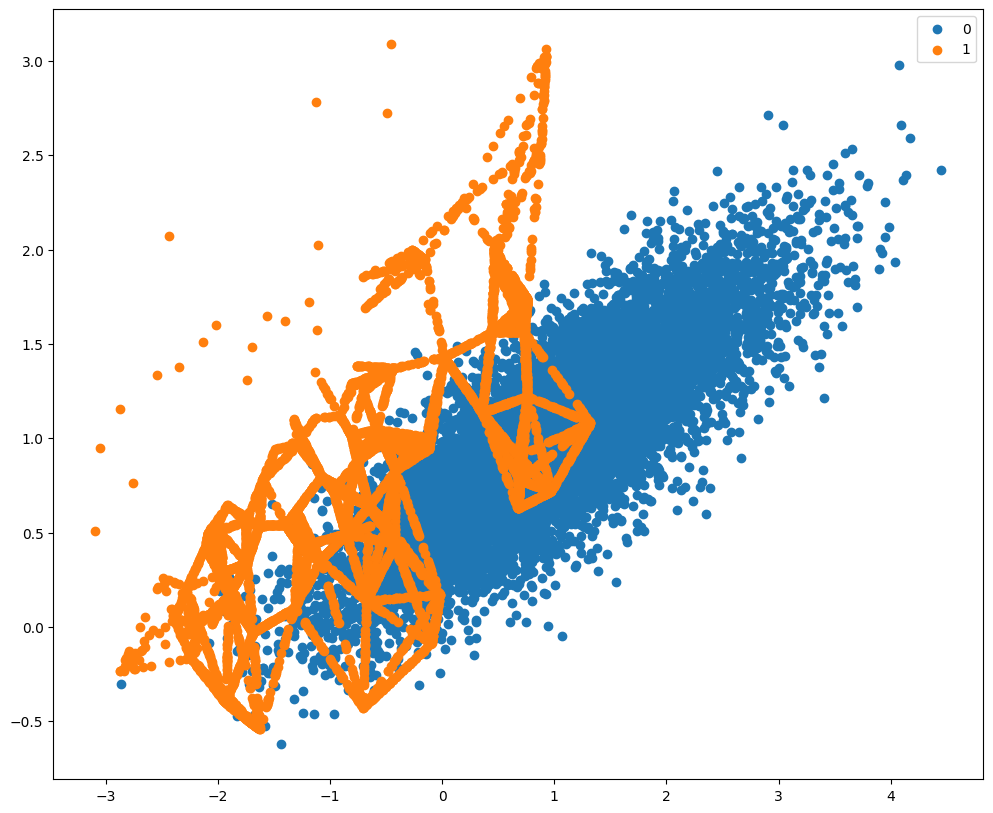

In [108]:
# scatter plot of examples by class label
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_adasyn.items():
    row_ix = where(y_adasyn == label)[0]
    pyplot.scatter(X_adasyn[row_ix, 0],
                   X_adasyn[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()


### Undersampling Techniques

Undersampling adalah suatu metode dalam **mengurangi** data mayoritas. Terdapat beberapa teknik dalam melakukan undersampling, seperti Random Undersampling, Condensed Nearest Neighbor Rule (CNN), dan Near Miss Undersampling. Konsep dari penerapan Random Undersampling dan Near Miss Undersampling ini dapat dilihat pada slide scele yang tentunya sudah kalian pelajari di kelas.

Berikut ini merupakan contoh data dengan imbalanced classification.

In [109]:
# example of random undersampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=2, weights=[0.90], flip_y=0, random_state=1)
                           
# summarize class distribution
counter_y = Counter(y)
print(counter_y)


Counter({0: 9001, 1: 999})


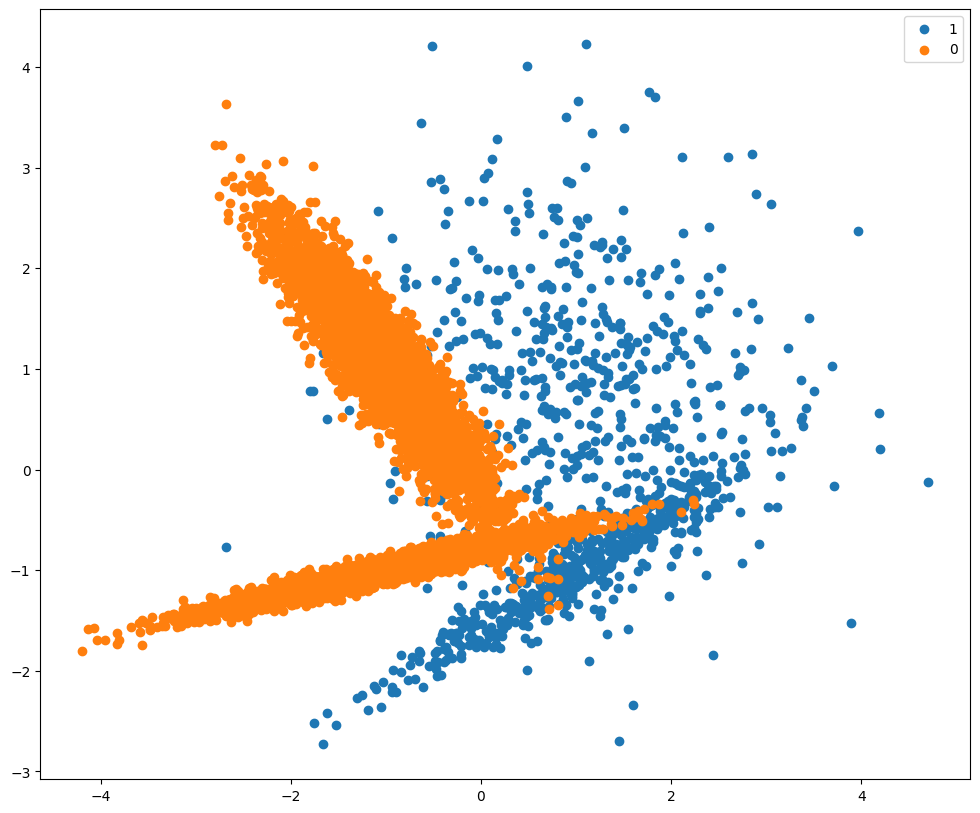

In [110]:
# scatter plot of examples by class label
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], 
                   X[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()


Dapat dilihat dari contoh data diatas dimana jumlah dari data minoritas sangat jauh lebih sedikit dibandingkan data mayoritasnya. Pada materi ini akan di contohkan salah satu penerapan undersampling dengan menggunakan Near Miss Undersampling dengan version 1.

#### Near Miss Undersampling

Near Miss mengacu pada kumpulan metode undersampling yang memilih contoh berdasarkan jarak contoh kelas mayoritas ke contoh kelas minoritas.

Terdapat tiga versi dalam penerapan Near Miss, yaitu NearMiss-1, NearMiss-2, dan NearMiss-3.
*   NearMiss-1 : memilih contoh dari kelas mayoritas yang memiliki jarak rata-rata terkecil ke tiga contoh terdekat dari kelas minoritas. 

*   NearMiss-2 : memilih contoh dari kelas mayoritas yang memiliki jarak rata-rata terkecil ke tiga contoh terjauh dari kelas minoritas. 

*   NearMiss-3 : memilih sejumlah contoh kelas mayoritas untuk setiap contoh di kelas minoritas yang paling dekat.

Berikut ini contoh penerapan Near Miss Undersampling dengan version 1 dalam imbalanced clasification

In [111]:
# define undersample strategy
nearmiss = NearMiss()

# fit and apply the transform
X_nearmiss, y_nearmiss = nearmiss.fit_resample(X, y)

# summarize class distribution
counter_y_nearmiss = Counter(y_nearmiss)
print(counter_y_nearmiss)


Counter({0: 999, 1: 999})


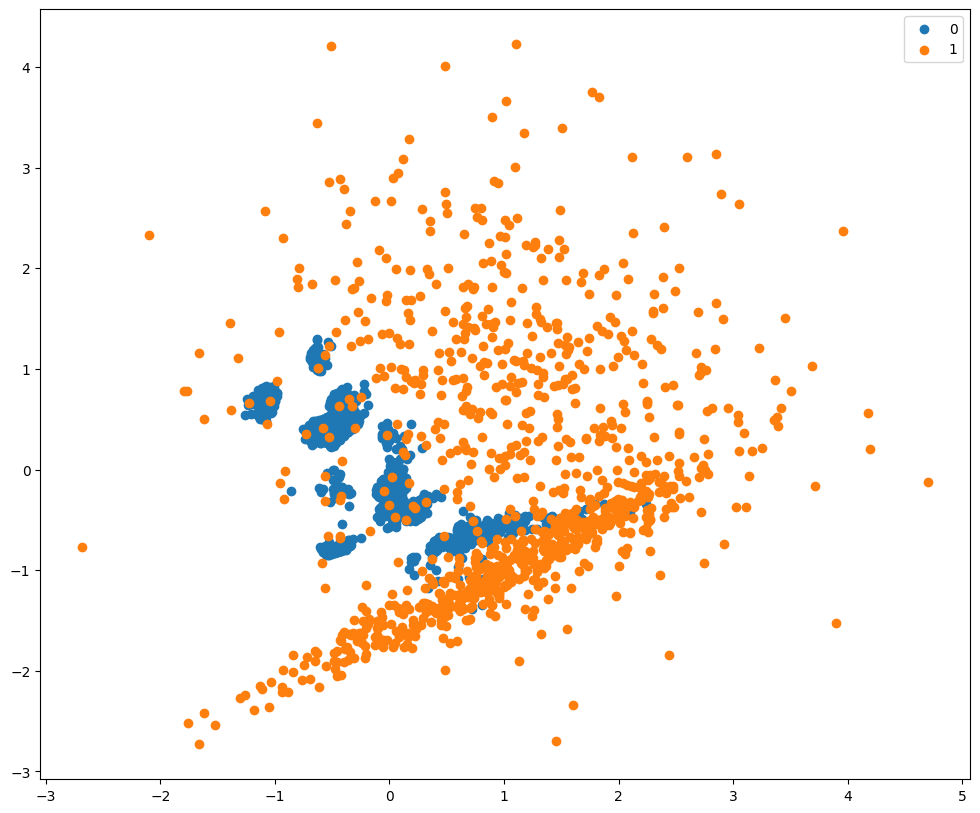

In [112]:
# scatter plot of examples by class label
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_nearmiss.items():
    row_ix = where(y_nearmiss == label)[0]
    pyplot.scatter(X_nearmiss[row_ix, 0],
                   X_nearmiss[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()


##### Penerapan Undersampling

##### Random Undersampling

In [113]:
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_undersample, y_undersample = undersample.fit_resample(X, y)

# summarize class distribution
counter_y_undersample = Counter(y_undersample)
print(counter_y_undersample)


Counter({0: 999, 1: 999})


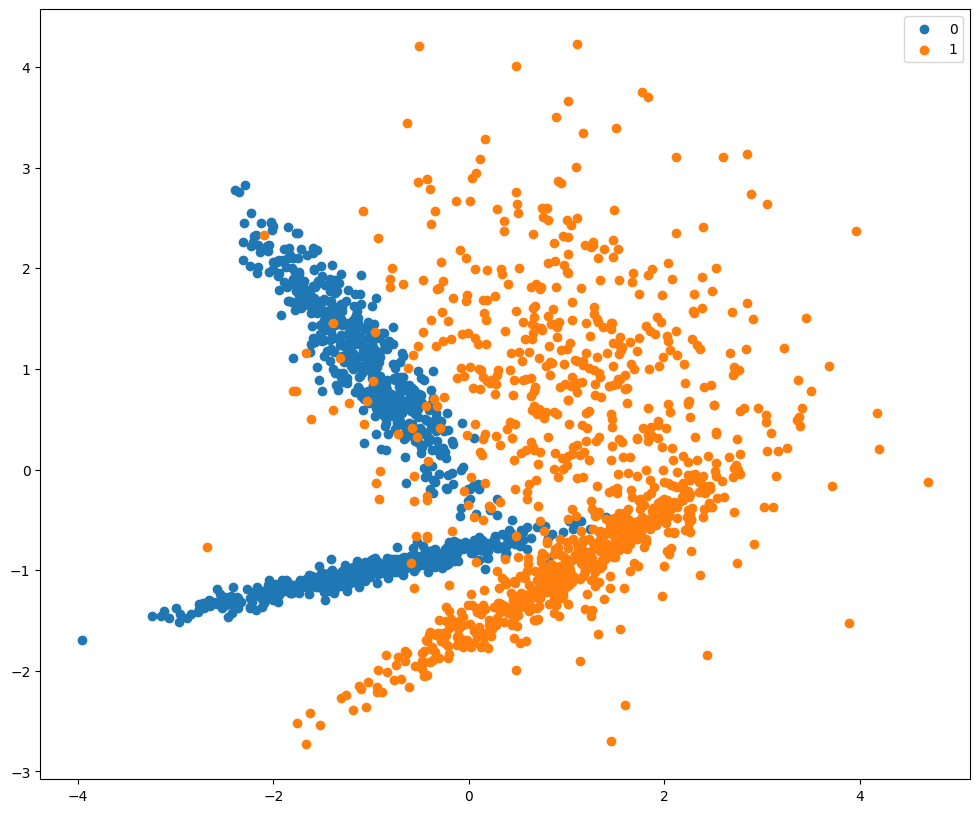

In [114]:
# scatter plot of examples by class label
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_undersample.items():
    row_ix = where(y_undersample == label)[0]
    pyplot.scatter(X_undersample[row_ix, 0],
                   X_undersample[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()


##### Near Miss Undersampling Versi 2

In [115]:
# define undersample strategy
nearmiss = NearMiss(version=2)

# fit and apply the transform
X_nearmiss, y_nearmiss = nearmiss.fit_resample(X, y)

# summarize class distribution
counter_y_nearmiss = Counter(y_nearmiss)
print(counter_y_nearmiss)


Counter({0: 999, 1: 999})


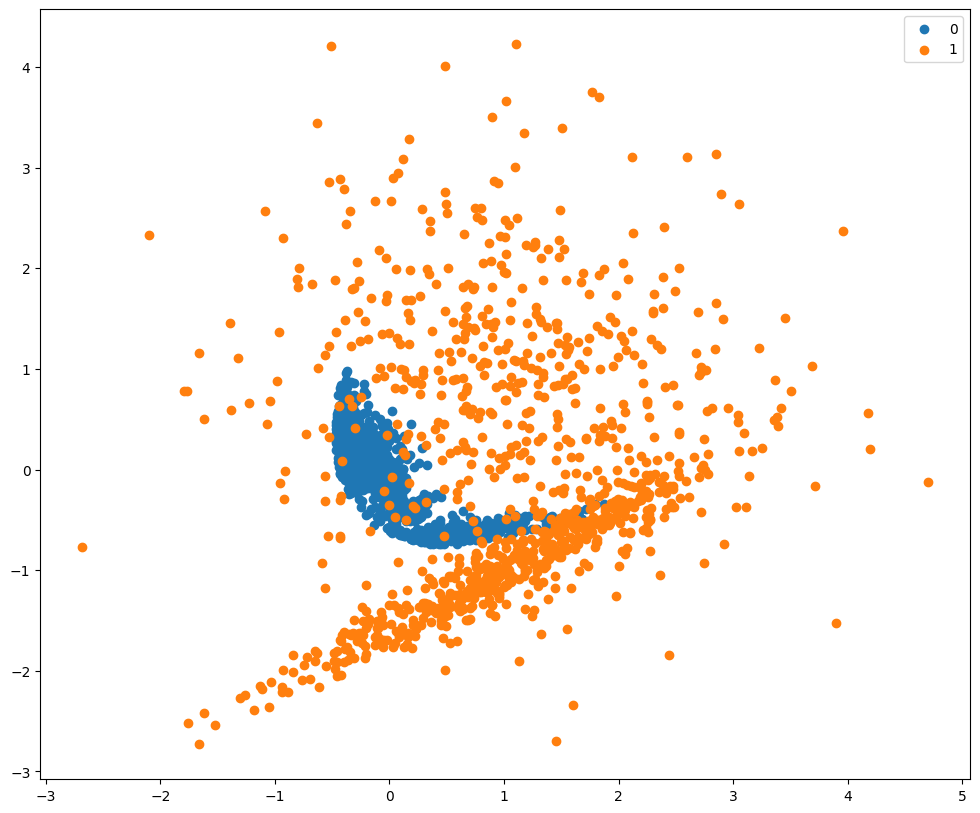

In [116]:
# scatter plot of examples by class label
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_nearmiss.items():
    row_ix = where(y_nearmiss == label)[0]
    pyplot.scatter(X_nearmiss[row_ix, 0],
                   X_nearmiss[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()


##### Near Miss Undersampling Versi 3

In [117]:
# define undersample strategy
nearmiss = NearMiss(version=3)

# fit and apply the transform
X_nearmiss, y_nearmiss = nearmiss.fit_resample(X, y)

# summarize class distribution
counter_y_nearmiss = Counter(y_nearmiss)
print(counter_y_nearmiss)


Counter({1: 999, 0: 284})


c:\Users\Iqbal Asrif\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:188: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


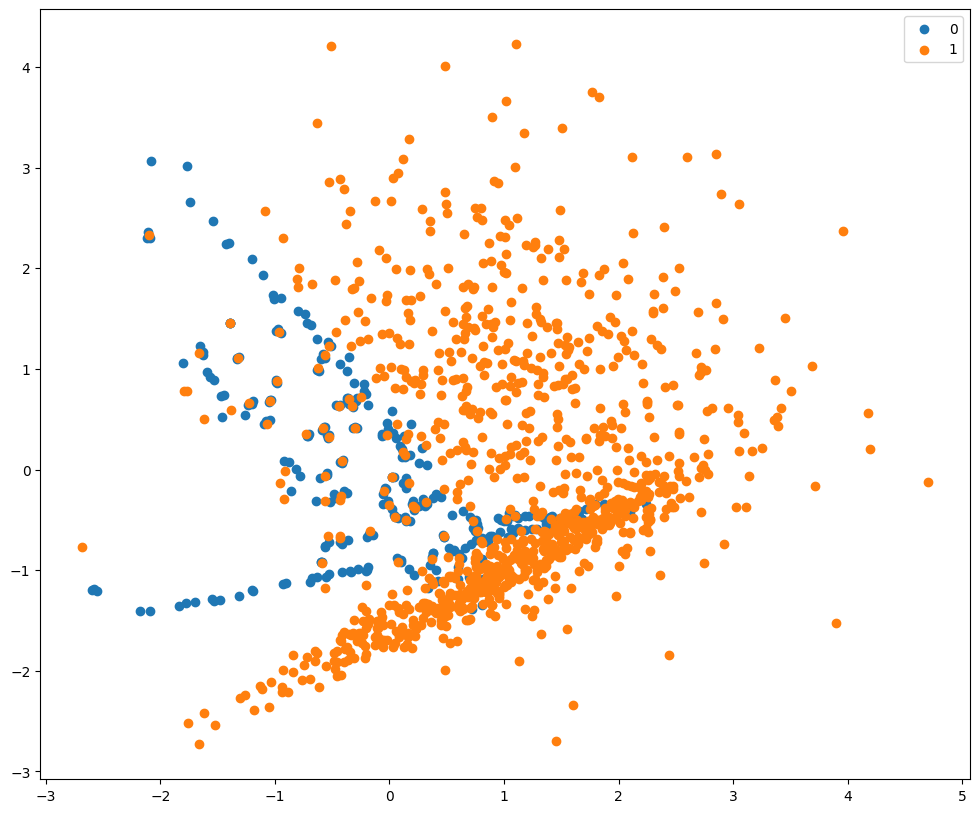

In [118]:
# scatter plot of examples by class label
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_nearmiss.items():
    row_ix = where(y_nearmiss == label)[0]
    pyplot.scatter(X_nearmiss[row_ix, 0],
                   X_nearmiss[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()


# Neural Network

## Teori

Neural Network (NN) merupakan suatu algoritma machine learning yang memiliki cara kerja menyerupai neuron pada otak manusia. Multi Layer Perceptron (MLP) merupakan salah satu jenis NN yang terdiri dari perceptron yang disusun menjadi beberapa layer. Contoh neuron pada NN dapat dilihat pada gambar berikut:

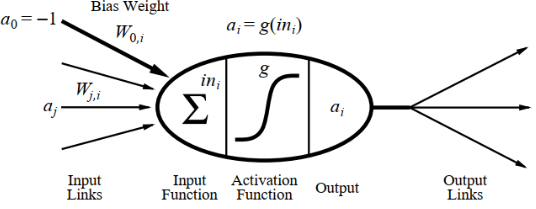

Pada gambar di atas, dapat dilihat bahwa pada setiap perceptron terdapat weight atau bobot untuk setiap input. Setiap input lalu dikalikan dengan bobot dan dijumlahkan seluruhnya. Selain itu, terdapat pula nilai bias yang merupakan suatu konstanta. Setelah operasi penjumlahan dilakukan, hasil penjumlahan dimasukkan ke activation function yang akan menghasilkan output. Terdapat beberapa jenis activation function, antara lain: TanH, ReLU, dan lain-lain yang dapat dilihat pada gambar di bawah ini.

![Activation function](https://miro.medium.com/max/1400/1*p_hyqAtyI8pbt2kEl6siOQ.png)

Weight suatu input didapatkan melalui training terhadap data setelah diinisiasi dengan bilangan random. Weight tersebut lalu akan di-update apabila output tidak sesuai dengan target yang diinginkan. Formula untuk melakukan update bobot/weight dapat dilihat pada rumus berikut:

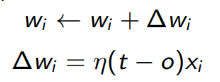

Penjelasan variabel pada rumus:
- $w_i$ merupakan weight untuk input ke-i
- $x_i$ merupakan input ke-i
- η merupakan learning rate
- t merupakan target output
- o merupakan output dari perceptron saat ini

Nilai w yang dicari merupakan nilai yang membuat selisih antara variabel t dan o menjadi sekecil mungkin.

Sumber:
- https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6
- Slide mata kuliah Data Mining 2019

## Klasifikasi Menggunakan NN
Pada bagian ini kita akan melakukan klasifikasi pada dataset Iris menggunakan Neural Network menggunakan MLPClassifier pada Scikit-Learn.

In [119]:
# Prepare dataset
cols = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None, names=cols)

dataset.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
60,5.0,2.0,3.5,1.0,Iris-versicolor
12,4.8,3.0,1.4,0.1,Iris-setosa
30,4.8,3.1,1.6,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
36,5.5,3.5,1.3,0.2,Iris-setosa


Kemudian, kita akan melakukan beberapa preprocessing sederhana seperti melakukan normalisasi pada dataset, melakukan train-test split, serta mengubah target variable agar dapat masuk ke dalam MLPClassifier

In [120]:
# Normalisasi menggunakan MinMax.
col_no_species = list(dataset[dataset.columns.difference(['species'])])
dataset_norm = dataset[col_no_species].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [121]:
dataset_norm.sample(5)

,petal_length,petal_width,sepal_length,sepal_width
30,0.101695,0.041667,0.138889,0.458333
25,0.101695,0.041667,0.194444,0.416667
23,0.118644,0.166667,0.222222,0.541667
148,0.745763,0.916667,0.527778,0.583333
77,0.677966,0.666667,0.666667,0.416667


In [122]:
# Mengubah target variable
species_name = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
species_code = [1, 2, 3]

dict_replace = dict(zip(species_name, species_code))
y = dataset["species"].replace(dict_replace)

dataset = pd.concat([dataset_norm, y], axis=1)
dataset.sample(5)

,petal_length,petal_width,sepal_length,sepal_width,species
114,0.694915,0.958333,0.416667,0.333333,3
44,0.152542,0.125000,0.222222,0.750000,1
101,0.694915,0.750000,0.416667,0.291667,3
52,0.661017,0.583333,0.722222,0.458333,2
73,0.627119,0.458333,0.500000,0.333333,2


In [123]:
# Melakukan train-test split
from sklearn.model_selection import train_test_split

X = dataset.iloc[:,:-1]
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Setelah melakukan preprocessing pada dataset kita dapat memulai proses training pada model.

In [124]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(solver='adam', alpha=1e-5, random_state=42,
                           hidden_layer_sizes=(50,20), max_iter=200, 
                           learning_rate_init=0.001, activation='relu')
classifier.fit(X_train, y_train)

c:\Users\Iqbal Asrif\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(50, 20), random_state=42)

Hidden layer pada MLP dapat di-konfigurasi melalui hyperparameter **hidden_layer_sizes**. Pada contoh diatas terdapat satu hidden layer dengan 100 units pada hidden layer tersebut. Jika kita ingin membuat suatu model dengan 3 hidden layer dengan 20 units pada setiap hidden layer, kita dapat melakukan konfigurasi pada **hidden_layer_sizes** menjadi **hidden_layer_sizes=(20, 20, 20,)**

In [125]:
print("Hasil Prediksi MLPClassifier:")
prediction = classifier.predict(X_test)
print(prediction)

print("\nGround Truth / Dataset Test Asli")
print(y_test)

Hasil Prediksi MLPClassifier:
[2 1 3 2 3 1 2 3 2 2 3 1 1 1 1 3 3 2 2 3 1 3 1 3 3 3 3 3 1 1]

Ground Truth / Dataset Test Asli
[2 1 3 2 2 1 2 3 2 2 3 1 1 1 1 2 3 2 2 3 1 3 1 3 3 3 3 3 1 1]


# Pertanyaan

## Dataset

Tugas ini menggunakan <b>Pokemon dataset</b> (Sumber: https://www.kaggle.com/datasets/mihirbindal/the-complete-pokemon-dataset dengan perubahan.)  
Dataset terdiri dari:
 - 11 atribut 
    * name – This column has the English names for those Pokemon
    * generation – The generation of each pokemon, ranging from 1 to 8
    * classfication – A text description of their species
    * abilities – Each column has a list containing all the abilities that the Pokemon can have including hidden abilities
    * height_m – Height of the pokemon in metres
    * weight_kg – Weight of Pokemon in kg
    * type1 – Primary type of Pokemon
    * type2 – Secondary type of the Pokemon
    * is_legendary - is it legendary? 0 for no, 1 for yes
    * is_mythical - is it mythical? 0 for no, 1 for yes
    * is_mega - is it a mega evolved form? 0 for no, 1 for yes
 - 1021 baris data

## Data Target sesuai NPM

Data target

Terdapat 3 data target pada dataset pokemon ini is_legendary, is_mythical dan is_mega
Untuk setiap mahasiswa mendapatkan target sesuai npmnya masing-masing. Berikut ketentuan npm setiap mahasiswa:

Npm dengan digit ke-9
 * 0-2: is_legendary
 * 3-5: is_mythical
 * 6-9: is_mega

## Ketentuan Pembuatan MLPClassifier

Untuk setiap soal dengan pembuatan model MLPClassifier gunakan konfigurasi berikut ini. 
*   solver: sgd
*   hidden_layer_sizes=50
*   alpha: 1e-5
*   random_state: 42
*   max_iter: 150
*   learning_rate_init: 0.2

Kemudian, buat dua model dengan activation function yang berbeda yaitu 'logistic' dan 'relu' [1]


In [126]:
# Read Data Pokemon
pokemon_data = pd.read_csv('pokemon_data.csv')
pokemon_data.head()

,Unnamed: 0.1,Unnamed: 0,name,generation,classfication,abilities,height_m,weight_kg,type1,type2,is_legendary,is_mythical,is_mega
0,0,0,Bulbasaur,1.0,Seed Pokemon,"['Overgrow', 'Chlorophyll']",0.7,6.9,Grass,Poison,0.0,0.0,0.0
1,1,1,Ivysaur,1.0,Seed Pokemon,"['Overgrow', 'Chlorophyll']",1.0,13.0,Grass,Poison,0.0,0.0,0.0
2,2,2,Venusaur,1.0,Seed Pokemon,"['Overgrow', 'Chlorophyll']",2.0,100.0,Grass,Poison,0.0,0.0,0.0
3,3,3,Mega Venusaur,1.0,Seed Pokemon,['Thick Fat'],2.4,155.5,Grass,Poison,0.0,0.0,1.0
4,4,4,Charmander,1.0,Lizard Pokemon,"['Blaze', 'Solar Power']",0.6,8.5,Fire,None,0.0,0.0,0.0


## Data awal

a. Ambil data untuk X (height_m and weight_kg) dan y (target, sesuai npm) [1]

In [127]:
# Set X and y to array
X = pokemon_data[['height_m', 'weight_kg']]
y = pokemon_data['is_mythical'].astype(np.int64)

In [128]:
X_np = X.to_numpy()

b. Hitung jumlah (counter) target [1]

In [129]:
counter = Counter(y)
counter

Counter({0: 991, 1: 30})

c. Lakukan visualisasi data [2]

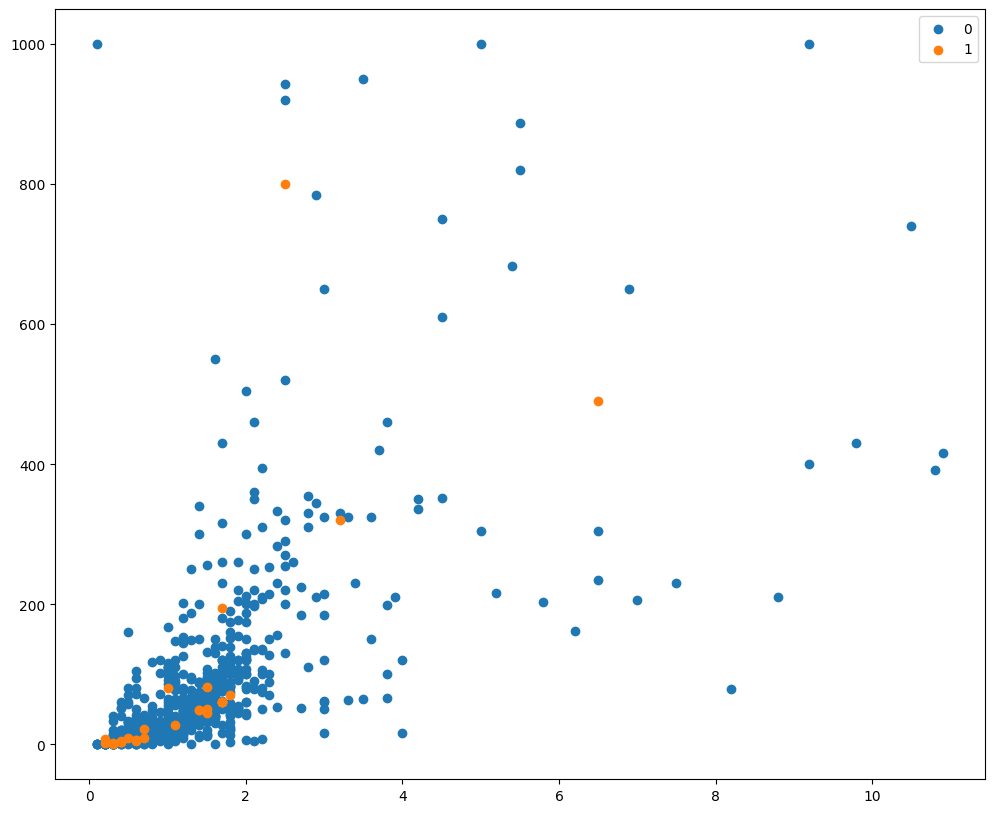

In [130]:
pyplot.figure(figsize=(12, 10))

for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X_np[row_ix, 0], X_np[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()

## Oversample

### Stratified split data

Lakukan splitting terhadap data train dan test dengan jumlah training set adalah sebanyak 80% dari data keseluruhan dengan parameter ```stratify=y```. Mahasiswa juga diperbolehkan untuk mengecek terlebih dahulu data y pada y training dan y testing. [4]

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [132]:
train_0, train_1 = len(y_train[y_train == 0]), len(y_train[y_train == 1])
test_0, test_1 = len(y_test[y_test == 0]), len(y_test[y_test == 1])

print(f"Train: 0 = {train_0}, 1 = {train_1}")
print(f"Test: 0 = {test_0}, 1 = {test_1}")

Train: 0 = 792, 1 = 24
Test: 0 = 199, 1 = 6


### Bagian 1

Pilih dua metode oversampling sesuai keinginan anda untuk dipelajari. Namun, lebih baik anda mempelajari seluruhnya (Random Oversampling, SMOTE, BordelineSMOTE, SVMSMOTE, ADASYN)

1. Model 1 [6]

a. Lakukan Oversample pada X and y (training) dengan model yang dipilih

In [133]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)

In [134]:
X_over_np = X_over.to_numpy()

b. Hitung jumlah (counter) target setelah oversample

In [135]:
counter = Counter(y_over)
counter

Counter({0: 991, 1: 991})

c. Lakukan visualisasi data setelah oversample

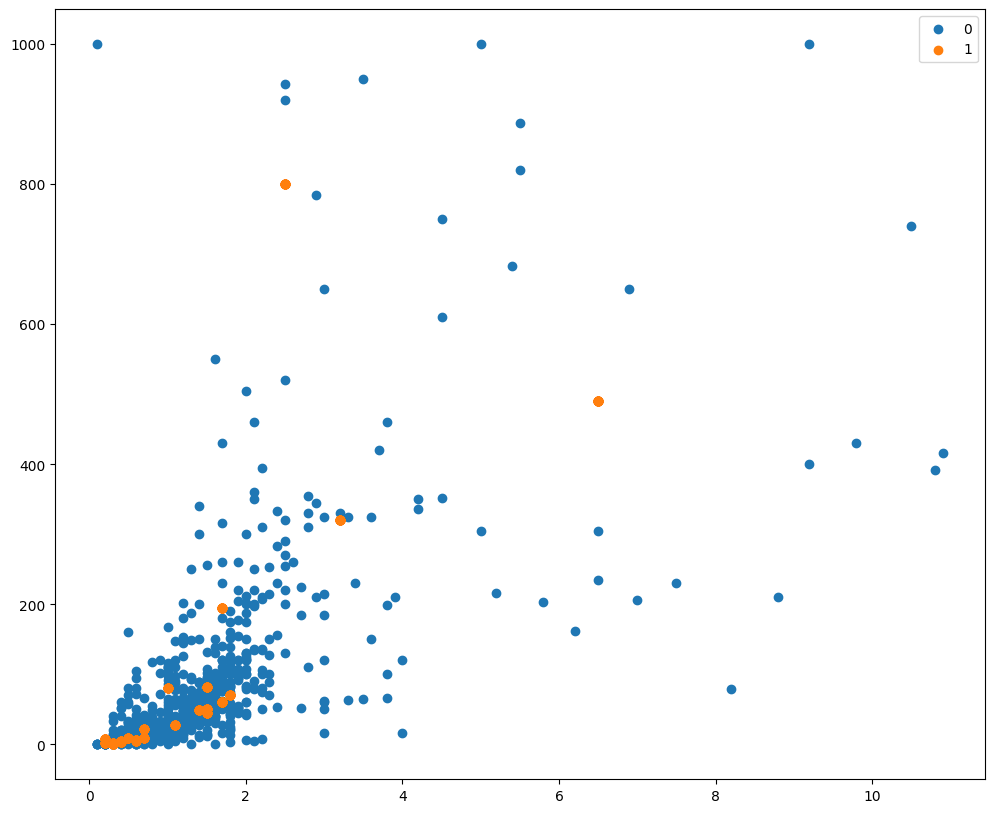

In [136]:
pyplot.figure(figsize=(12, 10))

for label, _ in counter.items():
    row_ix = where(y_over == label)[0]
    pyplot.scatter(X_over_np[row_ix, 0], X_over_np[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()

2. Model 2 [6]

a. Lakukan Oversample pada X and y (training) dengan model yang dipilih

In [137]:
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)

In [138]:
X_smote_np = X_smote.to_numpy()

b. Hitung jumlah (counter) target setelah oversample

In [139]:
counter = Counter(y_smote)
counter

Counter({0: 991, 1: 991})

c. Lakukan visualisasi data setelah oversample

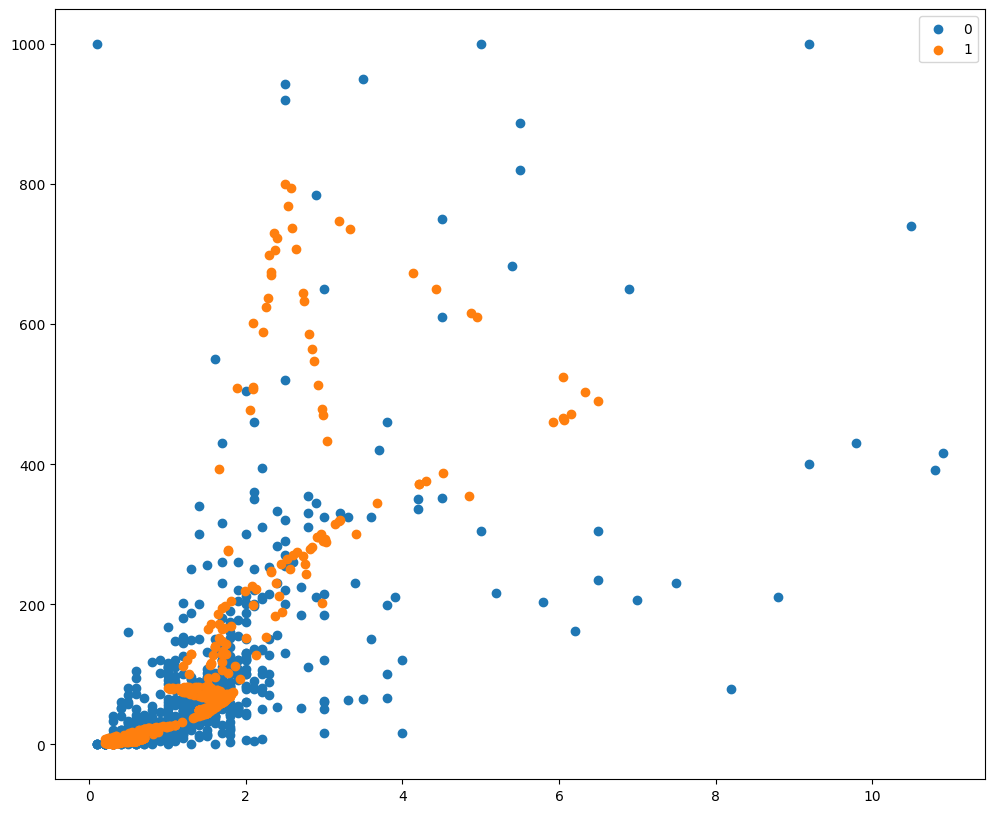

In [140]:
pyplot.figure(figsize=(12, 10))

for label, _ in counter.items():
    row_ix = where(y_smote == label)[0]
    pyplot.scatter(X_smote_np[row_ix, 0], X_smote_np[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()

X. Model 3

a. Lakukan Oversample pada X and y (training) dengan model yang dipilih

In [141]:
oversample = BorderlineSMOTE()
X_borderline_smote, y_borderline_smote = oversample.fit_resample(X, y)

In [142]:
X_borderline_smote_np = X_borderline_smote.to_numpy()

b. Hitung jumlah (counter) target setelah oversample

In [143]:
counter = Counter(y_borderline_smote)
counter

Counter({0: 991, 1: 991})

c. Lakukan visualisasi data setelah oversample

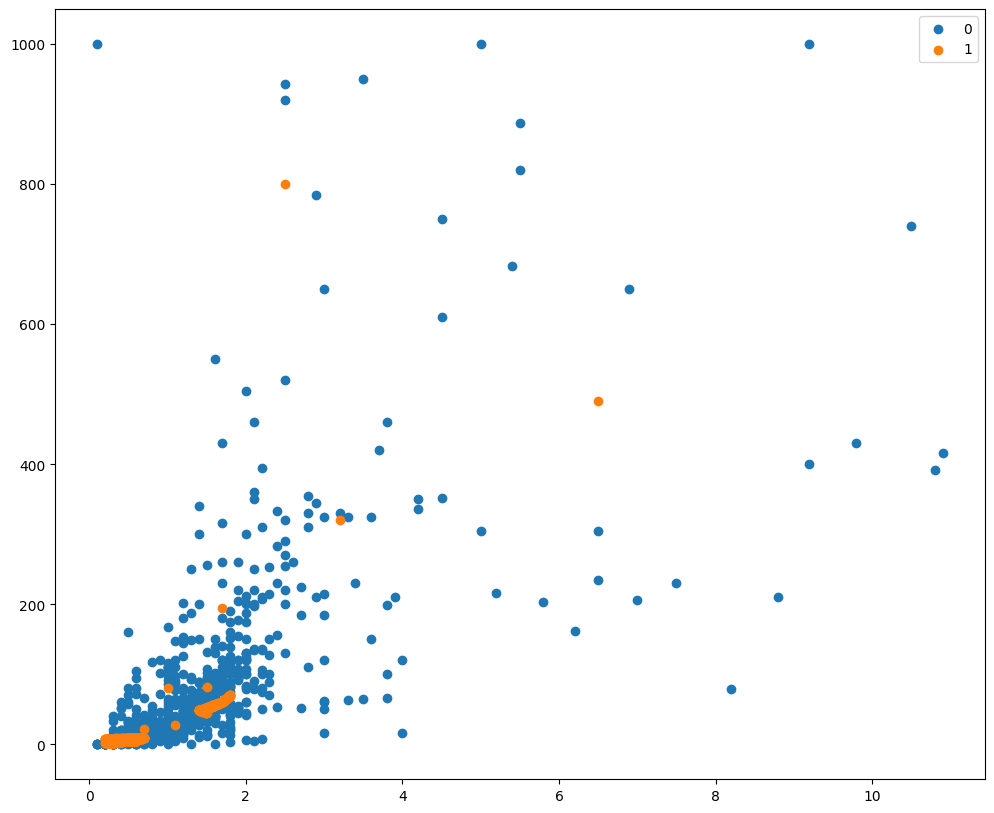

In [144]:
pyplot.figure(figsize=(12, 10))

for label, _ in counter.items():
    row_ix = where(y_borderline_smote == label)[0]
    pyplot.scatter(X_borderline_smote_np[row_ix, 0], X_borderline_smote_np[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()

X. Model 4

a. Lakukan Oversample pada X and y (training) dengan model yang dipilih

In [145]:
oversample = SVMSMOTE()
X_svm_smote, y_svm_smote = oversample.fit_resample(X, y)

In [146]:
X_svm_smote_np = X_svm_smote.to_numpy()

b. Hitung jumlah (counter) target setelah oversample

In [147]:
counter = Counter(y_svm_smote)
counter

Counter({0: 991, 1: 623})

c. Lakukan visualisasi data setelah oversample

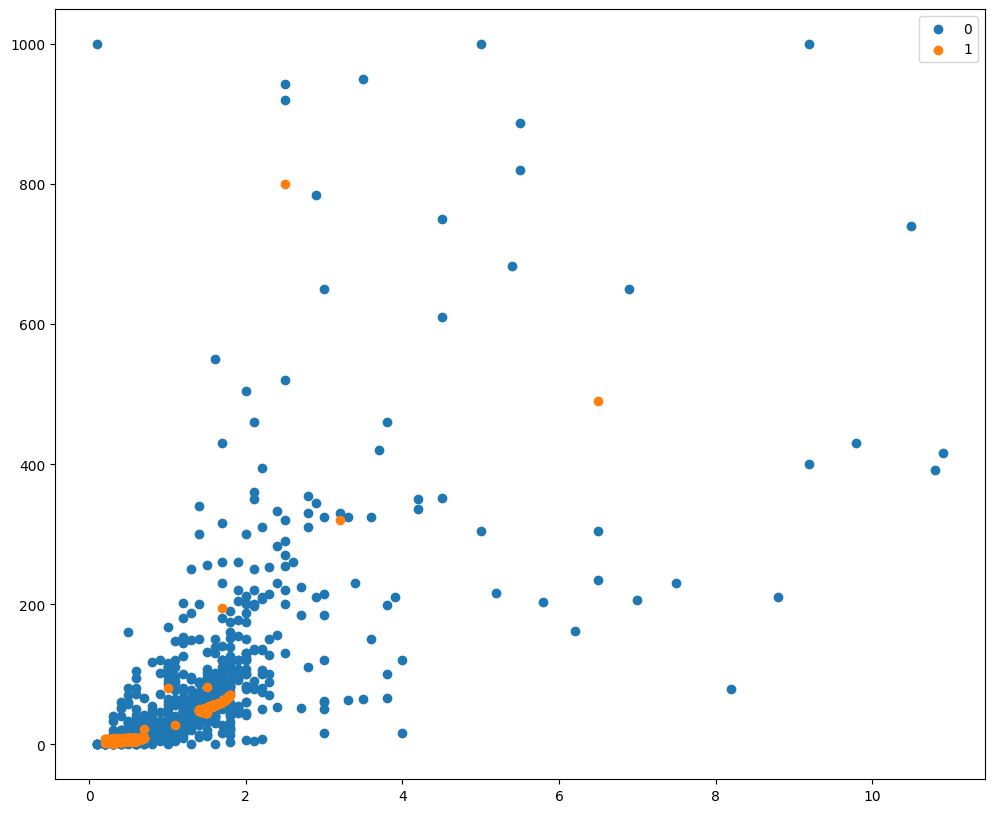

In [148]:
pyplot.figure(figsize=(12, 10))

for label, _ in counter.items():
    row_ix = where(y_svm_smote == label)[0]
    pyplot.scatter(X_svm_smote_np[row_ix, 0], X_svm_smote_np[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()

X. Model 5

a. Lakukan Oversample pada X and y (training) dengan model yang dipilih

In [149]:
oversample = ADASYN()
X_adasyn, y_adasyn = oversample.fit_resample(X, y)

In [150]:
X_adasyn_np = X_adasyn.to_numpy()

b. Hitung jumlah (counter) target setelah oversample

In [151]:
counter = Counter(y_adasyn)
counter

Counter({0: 991, 1: 989})

c. Lakukan visualisasi data setelah oversample

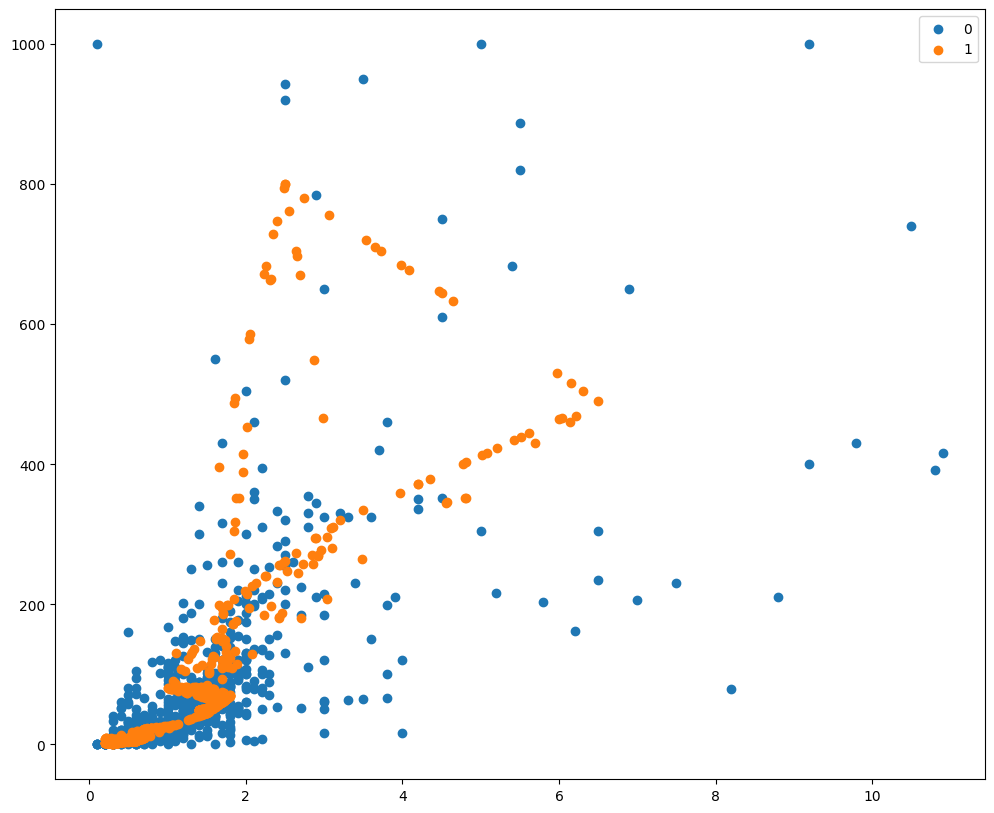

In [152]:
pyplot.figure(figsize=(12, 10))

for label, _ in counter.items():
    row_ix = where(y_adasyn == label)[0]
    pyplot.scatter(X_adasyn_np[row_ix, 0], X_adasyn_np[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()

3. Adakah perbedaan yang kalian dapat dari dua metode over sample yang kalian lakukan? Jelaskan dengan kata-kata anda sendiri! [5]

Karakteristik data dari masing-masing metode oversample yang digunakan
- RandomOverSampler(): Menduplikasi data kelas minoritas secara acak. Hal ini akan menimbulkan duplikasi pada kelas minoritas dan tidak dapat melakukan oversample relatif terhadap kelas mayoritas. Terlihat bahwa data oversample terletak pada titik-titik yang sama dengan data kelas minoritas sebelumnya, sehingga tidak ada perubahan dalam scater plot yang ada.
- SMOTE(: Mmbuat data kelas minoritas baru yang memiliki kedekatan dalam feature space terhadap data kelas minoritas yang sudah ada. Cara ini dapat membuat oversample data baru akan tetapi tidak dilakukan dengan pertimbangan terhadap kelas mayoritas sehingga dapat menimbulkan overlap data. Terlihat bahwa terdapat banyak data oversample baru, namun karena tidak ada pertimbangan terhadap kelas mayoritas maka data oversample tersebut overlap dengan data kelas mayoritas
- BorderlineSMOTE(): Melakukan cara yang sama dengan SMOTE() namun hanya terdapat data kelas minoritas tertentu saja. Yaitu data yang termasuk dalam kategori borderline yaitu berada di antara kelas minoritas dan mayoritas. Untuk mendapatkan data-data ini dapat dilakukan klasifikasi seperti menggunakan k-nearest neighbor. Terlihat bahwa data oversample baru terbentuk pada perbatasan kelas minoritas dan mayoritas. 
- SVMSMOTE(): Sama seperti BorderlineSMOTE() namun algoritma klasifikasi data menggunakan SVM. Akan menghasilkan scatter plot yang kurang lebih sama dengan BorderlineSMOTE()
- ADASYN(): Membuat data oversample berdasarkan distribusinya, semakin sulit sebuah data dipelajari maka data sintetis yang akan dihasilkan untuk data tersebut akan semakin banyak. Terlihat dari scatter plot bahwa oversample terfokus pada titik-titik data minoritas yang tersebar dan cenderung sulit untuk dipelajari.

### Bagian 2

Lakukan klasifikasi pada data yang belum dan yang sudah di oversampling dengan metode MLP. Untuk data yang sudah di oversampling mahasiswa diminta untuk menerapkan stratified cross validation dan gunakan minimal satu model oversampling (Mahasiswa boleh pakai pipeline ataupun tidak).

1. Lakukanlah klasifikasi menggunakan MLPClassifier dengan data sebelum di oversample [8]

a. Lakukan training pada model MLPClassifier



In [153]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [155]:
counter = Counter(y_test)
counter

Counter({0: 202, 1: 3})

In [156]:
MLP = MLPClassifier(solver='adam', alpha=1e-5, random_state=42,
                           hidden_layer_sizes=(50,20), max_iter=200, 
                           learning_rate_init=0.001, activation='relu')
MLP.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(50, 20), random_state=42)

b. Lakukann prediksi data testing

In [157]:
y_pred = MLP.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [158]:
print("Hasil Prediksi MLPClassifier:")
print(y_pred)

print("\nGround Truth / Dataset Test Asli")
print(y_test)

Hasil Prediksi MLPClassifier:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Ground Truth / Dataset Test Asli
616     0
421     0
355     0
1002    0
643     0
       ..
231     0
961     0
695     0
24      0
72      0
Name: is_mythical, Length: 205, dtype: int64


c. Tampilkan metrics evaluasi berupa nilai akurasi, presisi, recall, dan F1-Score

In [159]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"Accuracy Score: {accuracy_score(y_pred, y_test)}")
print(f"Precision Score: {precision_score(y_pred, y_test)}")
print(f"Recall Score: {recall_score(y_pred, y_test)}")
print(f"F1 Score: {f1_score(y_pred, y_test)}")

Accuracy Score: 0.9853658536585366
Precision Score: 0.0
Recall Score: 0.0
F1 Score: 0.0


c:\Users\Iqbal Asrif\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2. Lakukan klasifikasi pada data yang telah di oversampling dengan metode MLP dan menerapkan stratified cross validation (Mahasiswa boleh pakai pipeline ataupun tidak) [8]

a. Lakukan stratified cross validation dari hasil oversample yang telah dilakukan. Berikan hasilnya.



In [160]:
X_svm_smote_scaled = scaler.fit_transform(X_svm_smote)

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X_svm_smote_scaled, y_svm_smote, test_size=0.2, stratify=y_svm_smote)

In [162]:
counter = Counter(y_test)
counter

Counter({0: 198, 1: 125})

b. Lakukann training pada model MLPClassifier dengan data training yang telah di oversample

In [163]:
MLP_relu = MLPClassifier(solver='adam', alpha=1e-5, random_state=42,
                           hidden_layer_sizes=(50,20), max_iter=200, 
                           learning_rate_init=0.001, activation='relu')
MLP_relu.fit(X_train, y_train)

c:\Users\Iqbal Asrif\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(50, 20), random_state=42)

In [164]:
MLP_logi = MLPClassifier(solver='adam', alpha=1e-5, random_state=42,
                           hidden_layer_sizes=(50,20), max_iter=200, 
                           learning_rate_init=0.001, activation='logistic')
MLP_logi.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=(50, 20),
              random_state=42)

c. Lakukann prediksi data testing

In [165]:
y_pred_relu = MLP_relu.predict(X_test)
y_pred_relu

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [166]:
y_pred_logi = MLP_logi.predict(X_test)
y_pred_logi

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [167]:
print("Hasil Prediksi MLPClassifier Relu:")
print(y_pred_relu)

print("Hasil Prediksi MLPClassifier Logistic:")
print(y_pred_logi)

print("\nGround Truth / Dataset Test Asli")
print(y_test)

Hasil Prediksi MLPClassifier Relu:
[0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0]
Hasil Prediksi MLPClassifier Logistic:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

d. Tampilkan metrics evaluasi berupa nilai akurasi, presisi, recall, dan F1-Score

In [168]:
print("MLP Classifier Relu")
print(f"Accuracy Score: {accuracy_score(y_pred_relu, y_test)}")
print(f"Precision Score: {precision_score(y_pred_relu, y_test)}")
print(f"Recall Score: {recall_score(y_pred_relu, y_test)}")
print(f"F1 Score: {f1_score(y_pred_relu, y_test)}")

print()

print("MLP Classifier Logistic")
print(f"Accuracy Score: {accuracy_score(y_pred_logi, y_test)}")
print(f"Precision Score: {precision_score(y_pred_logi, y_test)}")
print(f"Recall Score: {recall_score(y_pred_logi, y_test)}")
print(f"F1 Score: {f1_score(y_pred_logi, y_test)}")

MLP Classifier Relu
Accuracy Score: 0.6780185758513931
Precision Score: 0.4
Recall Score: 0.6329113924050633
F1 Score: 0.4901960784313725

MLP Classifier Logistic
Accuracy Score: 0.6130030959752322
Precision Score: 0.0
Recall Score: 0.0
F1 Score: 0.0


c:\Users\Iqbal Asrif\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3. Bandingkan hasil dari MLPClassifier: [6] 

*   Tanpa oversample dan dengan oversample [3]. 
*   Perbedaan antara kedua activation function yang dipilih. Menurut anda mana yang lebih baik digunakan ReLU atau Logistic (Sigmoid) Function?[3].

Berikan analisis anda!

Diketahui bahwa problem klasifikasi sangat imbalanced. Ketika dilakukan learning tanpa adanya undersample maka algoritma akan mengabaikan kelas minoritas dan membuat prediksi berdasarkan kelas mayoritas. Hal in membuat model tidak dapat memprediksi kelas minoritas, padahal kelas minoritas adalah kelas yang menjadi fokus utama dari problem klasifikasi tersebut. Terlihat bahwa apabila dilakukan learning tanpa undersample, maka prediksi akan selalu menghasilkan nilai 0. Sedangkan apabila sudah dilakukan undersample, maka tidak (terlalu) imbalanced. Model dapat melakukan prediksi yang akurat terhadap kelas minoritas.

Menurut saya hasil prediksi lebih baik menggunakan activation function karena dapat memprediksi kelas minoritas, sedangkan logistic tidak dapat. Karena logistic tidak dapat memprediksi kelas minoritas maka analisis presisi, recall, dan f1 score tidak dapat digunakan.

## Undersample

### Stratified split data

Lakukan splitting terhadap data train dan test dengan jumlah training set adalah sebanyak 75% dari data keseluruhan dengan parameter ```stratify=y```. Mahasiswa juga diperbolehkan untuk mengecek terlebih dahulu data y pada y training dan y testing. [4]


### Bagian 1 

1. Lakukanlah undersample menggunakan Random Undersampling [6]

a. Undersample X and y (training) dengan model Random Undersampling 

In [169]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X, y)

In [170]:
X_under_np = X_under.to_numpy()

b. Hitung jumlah (counter) target setelah undersample

In [171]:
counter = Counter(y_under)

c. Visualization (setelah undersample)

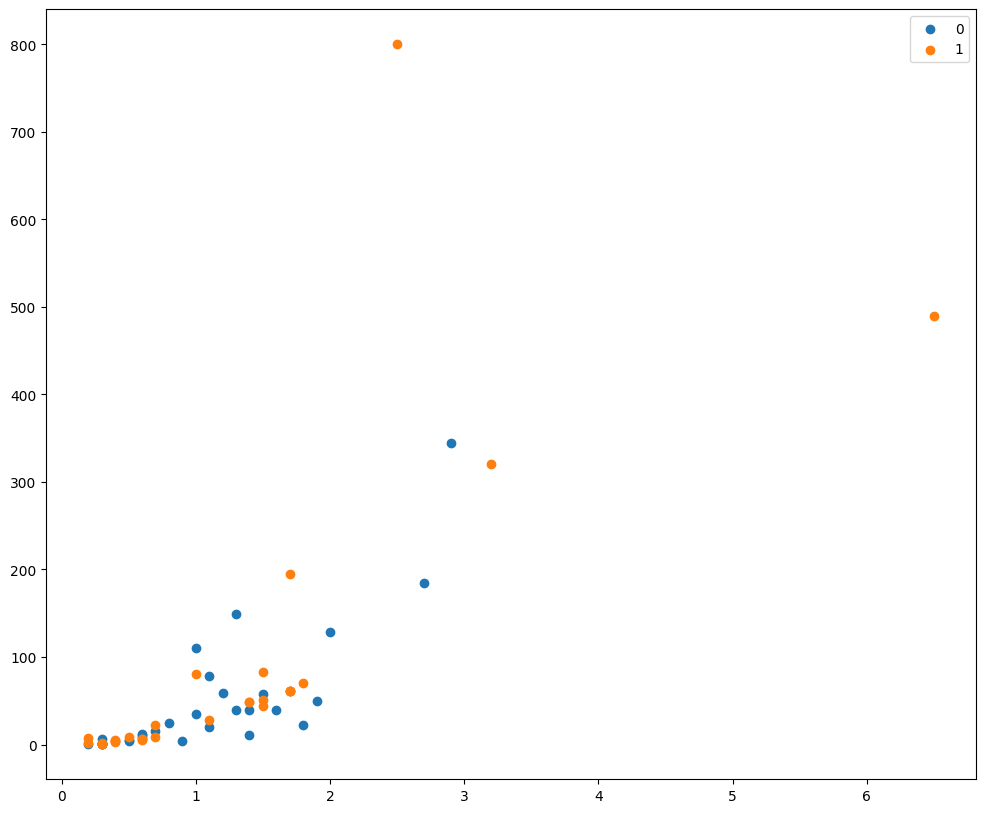

In [172]:
pyplot.figure(figsize=(12, 10))

for label, _ in counter.items():
    row_ix = where(y_under== label)[0]
    pyplot.scatter(X_under_np[row_ix, 0], X_under_np[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()

2. Lakukanlah undersample menggunakan NearMiss dengan version 2 atau 3 [6]

a. Undersample X and y (training) dengan model NearMiss

In [173]:
undersample = NearMiss(version=2)
X_nearmiss, y_nearmiss = undersample.fit_resample(X, y)

In [174]:
X_nearmiss_np = X_nearmiss.to_numpy()

b. Hitung jumlah (counter) target setelah undersample

In [175]:
counter = Counter(y_nearmiss)
counter

Counter({0: 30, 1: 30})

c. Visualization (setelah undersample)

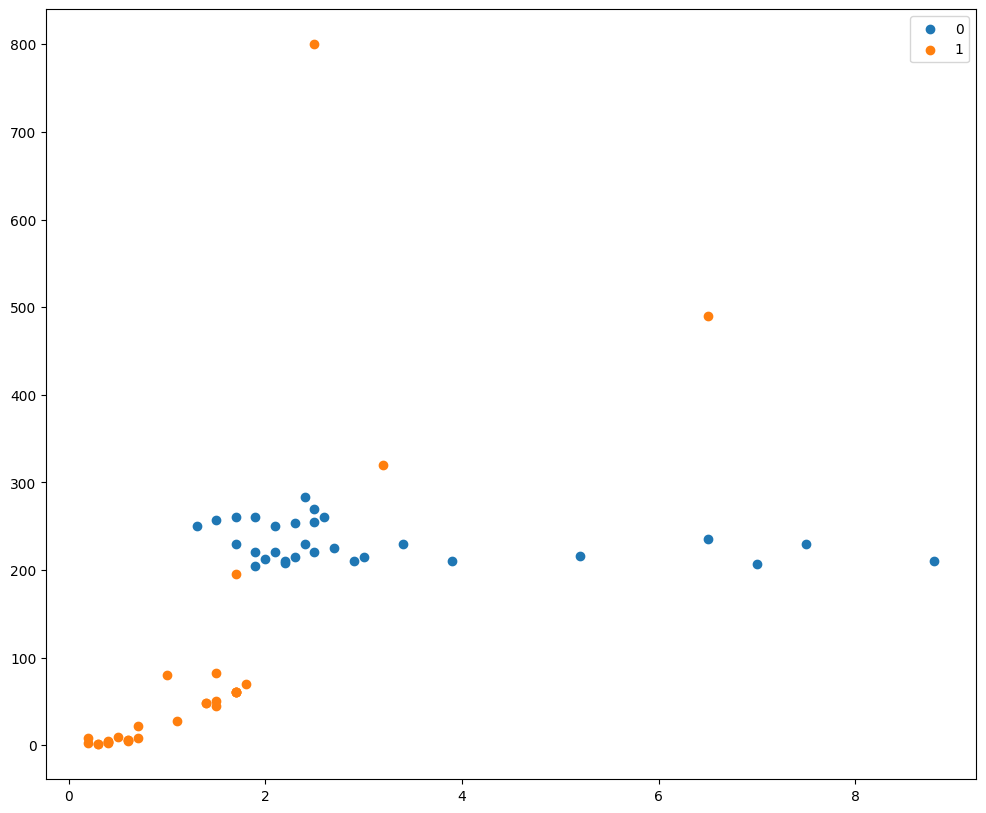

In [176]:
pyplot.figure(figsize=(12, 10))

for label, _ in counter.items():
    row_ix = where(y_nearmiss == label)[0]
    pyplot.scatter(X_nearmiss_np[row_ix, 0], X_nearmiss_np[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()

3. Adakah perbedaan yang kalian dapat dari dua model undersample yang kalian lakukan? Jelaskan dengan kata-kata anda sendiri! [5]

Karakteristik dari kedua model undersample yang digunakan
- RandomUnderSampler(): Melakukan undersample secara random terhadap kelas mayoritas. Terlihat dari titik-titik data kelas mayoritas yang berkurang secara drastis. Adapun apabila dilakukan secara berulang-ulang maka titik-titik data yang di-keep akan sangat beragam dan kemungkinan besar scatter plot akan berubah secara signifikan.
- NearMiss(version=2): Melakukan undersampling dengan menyimpan data kelas mayoritas yang memiliki average distance terkecil terhadap data kelas minoritas terjauh. Dapat terlihat bahwa data kelas mayoritas yang disimpan adalah data yang berada ditengah-tengah karena akan memiliki averarage distance terkecil.

### Bagian 2

Lakukan klasifikasi pada data yang belum dan yang sudah di undersampling dengan metode MLP. Untuk data yang sudah di undersampling mahasiswa diminta untuk menerapkan stratified cross validation dan gunakan minimal satu model undersampling (Mahasiswa boleh pakai pipeline ataupun tidak).

1. Lakukanlah klasifikasi menggunakan MLPClassifier dengan data sebelum di undersample [8]

a. Lakukann training pada model MLPClassifier

In [177]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25)

In [179]:
counter = Counter(y_test)
counter

Counter({0: 250, 1: 6})

In [180]:
MLP = MLPClassifier(solver='adam', alpha=1e-5, random_state=42,
                           hidden_layer_sizes=(50,20), max_iter=200, 
                           learning_rate_init=0.001, activation='relu')
MLP.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(50, 20), random_state=42)

b. Lakukan prediksi data testing

In [181]:
y_pred = MLP.predict(X_test)

In [182]:
print("Hasil Prediksi MLPClassifier")
print(y_pred)

print("\nGround Truth / Dataset Test Asli")
print(y_test)

Hasil Prediksi MLPClassifier
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Ground Truth / Dataset Test Asli
907    0
117    0
839    0
381    0
40     0
      ..
391    0
570    0
982    0
821    0
250    0
Name: is_mythical, Length: 256, dtype: int64


c. Tampilkan metrics evaluasi berupa nilai akurasi, presisi, recall, dan F1-Score

In [183]:
print(f"Accuracy Score: {accuracy_score(y_pred, y_test)}")
print(f"Precision Score: {precision_score(y_pred, y_test)}")
print(f"Recall Score: {recall_score(y_pred, y_test)}")
print(f"F1 Score: {f1_score(y_pred, y_test)}")

Accuracy Score: 0.9765625
Precision Score: 0.0
Recall Score: 0.0
F1 Score: 0.0


c:\Users\Iqbal Asrif\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2. Lakukan klasifikasi pada data yang telah di undersampling dengan metode MLPClassifier dan menerapkan stratified cross validation (Mahasiswa boleh pakai pipeline ataupun tidak) [8]

a. Lakukan stratified cross validation dari hasil undersample yang telah dilakukan. Berikan hasilnya

In [184]:
X_nearmiss_scaled = scaler.fit_transform(X_nearmiss)

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X_nearmiss_scaled, y_nearmiss, test_size=0.25, stratify=y_nearmiss)

In [186]:
counter = Counter(y_test)
counter

Counter({1: 7, 0: 8})

b.Lakukann training pada model MLPClassifier dengan data training yang telah di undersample.

In [187]:
MLP_relu = MLPClassifier(solver='adam', alpha=1e-5, random_state=42,
                           hidden_layer_sizes=(50,20), max_iter=200, 
                           learning_rate_init=0.001, activation='relu')
MLP_relu.fit(X_train, y_train)

c:\Users\Iqbal Asrif\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(50, 20), random_state=42)

In [188]:
MLP_logi = MLPClassifier(solver='adam', alpha=1e-5, random_state=42,
                           hidden_layer_sizes=(50,20), max_iter=200, 
                           learning_rate_init=0.001, activation='logistic')
MLP_logi.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=(50, 20),
              random_state=42)

c. Lakukann prediksi data testing

In [189]:
y_pred_relu = MLP_relu.predict(X_test)
y_pred_relu

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

In [190]:
y_pred_logi = MLP_logi.predict(X_test)
y_pred_logi

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [191]:
print("Hasil Prediksi MLPClassifier Relu:")
print(y_pred_relu)

print("Hasil Prediksi MLPClassifier Logistic:")
print(y_pred_logi)

print("\nGround Truth / Dataset Test Asli")
print(y_test)

Hasil Prediksi MLPClassifier Relu:
[1 1 0 0 0 1 0 0 1 1 1 0 0 0 0]
Hasil Prediksi MLPClassifier Logistic:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Ground Truth / Dataset Test Asli
54    1
43    1
15    0
18    0
52    1
36    1
13    0
0     0
57    1
44    1
46    1
26    0
7     0
5     0
10    0
Name: is_mythical, dtype: int64


d. Tampilkan metrics evaluasi berupa nilai akurasi, presisi, recall, dan F1-Score

In [192]:
print("MLP Classifier Relu")
print(f"Accuracy Score: {accuracy_score(y_pred_relu, y_test)}")
print(f"Precision Score: {precision_score(y_pred_relu, y_test)}")
print(f"Recall Score: {recall_score(y_pred_relu, y_test)}")
print(f"F1 Score: {f1_score(y_pred_relu, y_test)}")

print()

print("MLP Classifier Logistic")
print(f"Accuracy Score: {accuracy_score(y_pred_logi, y_test)}")
print(f"Precision Score: {precision_score(y_pred_logi, y_test)}")
print(f"Recall Score: {recall_score(y_pred_logi, y_test)}")
print(f"F1 Score: {f1_score(y_pred_logi, y_test)}")

MLP Classifier Relu
Accuracy Score: 0.9333333333333333
Precision Score: 0.8571428571428571
Recall Score: 1.0
F1 Score: 0.923076923076923

MLP Classifier Logistic
Accuracy Score: 0.5333333333333333
Precision Score: 0.0
Recall Score: 0.0
F1 Score: 0.0


c:\Users\Iqbal Asrif\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3. Bandingkan hasil dari MLPClassifier: [6] 

*   Tanpa undersample dan dengan undersample [3]. 
*   Perbedaan antara kedua activation function yang dipilih. Menurut anda mana yang lebih baik digunakan ReLU atau Logistic (Sigmoid) Function? [3].

Berikan analisis anda!

Diketahui bahwa problem klasifikasi sangat imbalanced. Ketika dilakukan learning tanpa adanya undersample maka algoritma akan mengabaikan kelas minoritas dan membuat prediksi berdasarkan kelas mayoritas. Hal in membuat model tidak dapat memprediksi kelas minoritas, padahal kelas minoritas adalah kelas yang menjadi fokus utama dari problem klasifikasi tersebut. Terlihat bahwa apabila dilakukan learning tanpa undersample, maka prediksi akan selalu menghasilkan nilai 0. Sedangkan apabila sudah dilakukan undersample, maka tidak (terlalu) imbalanced. Model dapat melakukan prediksi yang akurat terhadap kelas minoritas.

Terlihat bahwa MLP Classifier yang menggunakan activation function Rectifiec Linear Unit (ReLU) dapat memprediksi nilai kelas minoritas (1). Adapun untuk yang menggunakan activation function Logistic atau secara general Sigmoid tidak dapat memprediksi. Hal ini dikarenakan dalam ReLU tidak ada vanishing gradients, sedangkan sigmoid function termasuk Logistic memiliki vanishing gradients.

Jawab Disini

## Pertanyaan

1. Mengapa kita perlu menggunakan metode oversampling dan undersampling?

Ketika data imbalanced memiliki skew besar pada distribusi kelas, dimana kelas minoritas akan memiliki jumlah data yang sangat sedikit. Karena ketidak-seimbangan jumlah data yang ada, maka model akan cenderung mengabaikan kelas minoritas. Hal ini akan sangat berakibat fatal apabila kelas minoritas memiliki data yang sangat penting. Oleh karena itu, jumlah dari data perlu diseimbangkan.

2. Data seperti apa yang cocok untuk dilakukan proses undersampling atau oversampling?

Data imbalanced yang memiliki skew besar pada distribusi kelasnya seperti 1:100 atau 1:1000. Dimana kelas minoritas sangatlah penting, atau bahkan menjadi fokus utama dari model learning yang dilakukan. Perlu dilakukan agar data kelas minoritas dan data lainnya diperlakukan secara seimbang oleh model. Banyak data real-world yang sangat membutuhkan imbalanced classification, terutama yang memiliki efek sangat besar apabila salah melakukan prediksi terhadap kelas minoritas.

3. Apa yang akan terjadi jika kita menggunakan nilai learning rate yang terlalu rendah ataupun terlalu tinggi?

Learning rate adalah hyperparameter pada Neural Network yang mengatur response perubahan model terhadap error yang terjadi setiap peng-update-an model weights. Apaila learning rate terlalu rendah, maka response akan sangat lambat yang akan berakibat pada proses pembelajaran yang sangat lama bahkan bisa stuck. Adapun jika learning rate terlalu tinggi, maka response akan sangat cepat yang akan berakibat pada proses pembelajaran yang terlalu cepat sehingga hasil tidak akurat ataupun tidak stabil.